In [ ]:
pip install statsmodels

In [675]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [676]:
# Load the CSV file
data = pd.read_csv('Europe_5_Factors.csv', engine='python')

In [677]:
# Display initial data information
print(data.info())

# Describe initial data 
print(data.describe())

# Check for null values 
print(data.isnull().sum())

# Check data type 
print(data.dtypes)

# Check if the data is unique
print(data.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    439 non-null    object
 1   Mkt-RF  439 non-null    object
 2   SMB     439 non-null    object
 3   HML     439 non-null    object
 4   RMW     439 non-null    object
 5   CMA     439 non-null    object
 6   RF      439 non-null    object
dtypes: object(7)
memory usage: 24.4+ KB
None
          Date Mkt-RF   SMB  HML   RMW   CMA   RF
count      439    439   439  439   439   439  439
unique     439    396   335  347   312   314   83
top     199007    6.7  1.51  0.4  0.19  1.31    0
freq         1      3     4    5     5     5   72
Date      4
Mkt-RF    4
SMB       4
HML       4
RMW       4
CMA       4
RF        4
dtype: int64
Date      object
Mkt-RF    object
SMB       object
HML       object
RMW       object
CMA       object
RF        object
dtype: object
Date      439
Mkt-RF    396
SMB       335
HML 

In [678]:
# Drop rows with any missing values
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

print("Cleaned Data Info:")
print(data_cleaned.info())


Date      0
Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64
Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 442
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    438 non-null    object
 1   Mkt-RF  438 non-null    object
 2   SMB     438 non-null    object
 3   HML     438 non-null    object
 4   RMW     438 non-null    object
 5   CMA     438 non-null    object
 6   RF      438 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB
None


In [679]:
# Splitting the dataset
df_months = data_cleaned.iloc[:405]  # This includes rows from 0 to 405
df_years = data_cleaned.iloc[405:]  # This includes rows from 405 to the end of the DataFrame

In [680]:
df_months.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,199007,4.46,0.2,-1.52,0.28,1.1,0.68
1,199008,-10.88,0.25,-0.3,-0.5,1.66,0.66
2,199009,-12.19,1.92,0.44,0.33,1.78,0.6
3,199010,6.45,-2.58,-1.12,0.86,-0.73,0.68
4,199011,-0.42,-2.66,0.57,0.25,-0.33,0.57


In [681]:
df_years.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
410,1991,4.55,-10.09,-6.87,18.88,-2.24,5.6
411,1992,-11.29,-11.4,-1.31,8.89,2.71,3.51
412,1993,25.52,5.11,22.25,-4.78,13.48,2.9
413,1994,-0.48,9.31,6.68,2.67,4.28,3.9
414,1995,13.33,-9.75,-6.66,8.67,-7.44,5.6


In [682]:
# Rename the 'Date' column to 'Years and Months' and 'Years' in both parts
df_months = df_months.rename(columns={'Date': 'Years and Months'})
df_years= df_years.rename(columns={'Date': 'Years'})

In [683]:
# Sorting the datasets in descending order by 'Years and Months'
df_months_sorted = df_months.sort_values(by='Years and Months', ascending=False)
df_months_sorted.head()

,Years and Months,Mkt-RF,SMB,HML,RMW,CMA,RF
404,202403,3.26,-1.1,3.58,-2.11,0.44,0.43
403,202402,1.27,-2.9,-0.76,1.09,-1.95,0.42
402,202401,-1.56,-1.58,-1,0.71,0.31,0.47
401,202312,5.06,3.48,-0.61,0.24,-1.18,0.43
400,202311,9.21,-0.26,-0.91,-1.24,-2.49,0.44


In [684]:
# Sorting the datasets in descending order by Years
df_years_sorted = df_years.sort_values(by='Years', ascending=False)
df_years_sorted.head()

,Years,Mkt-RF,SMB,HML,RMW,CMA,RF
442,2023,13.37,-8.19,9.13,0.29,5.71,4.95
441,2022,-18.61,-7.48,19.15,-3.41,11.8,1.42
440,2021,16.77,-1.18,4.98,9.41,-5.1,0.04
439,2020,9.23,11.65,-30.11,5.3,-23.75,0.44
438,2019,21.81,-1.58,-11.77,6.53,-5.14,2.14


In [685]:
# Convert relevant columns to numeric types
df_months_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_months_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')
df_years_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_years_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')

# Convert relevant columns to numeric types
df_months[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_months_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')
df_years[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_years_sorted[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')


# Plotting Data

Years and Months    datetime64[ns]
Mkt-RF                     float64
SMB                        float64
HML                        float64
RMW                        float64
CMA                        float64
RF                         float64
dtype: object


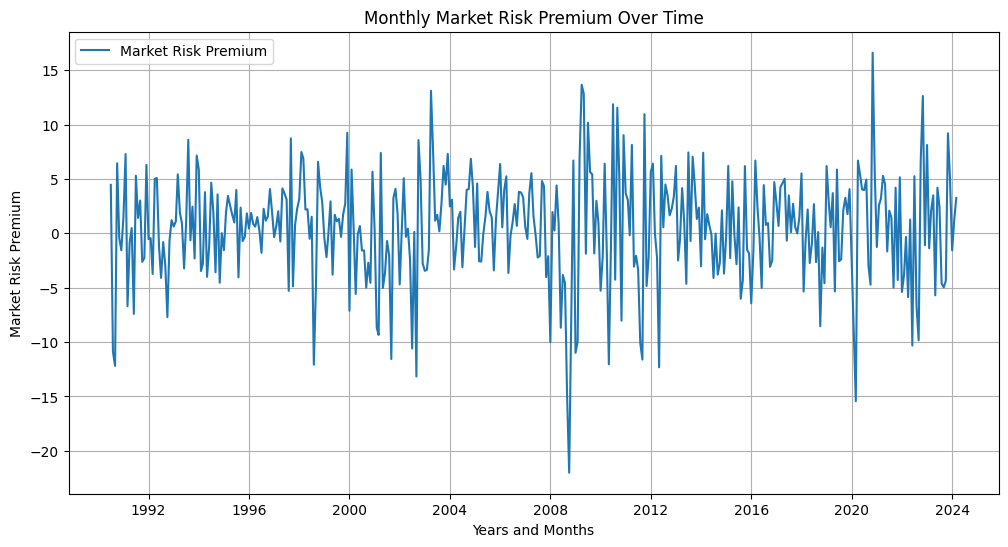

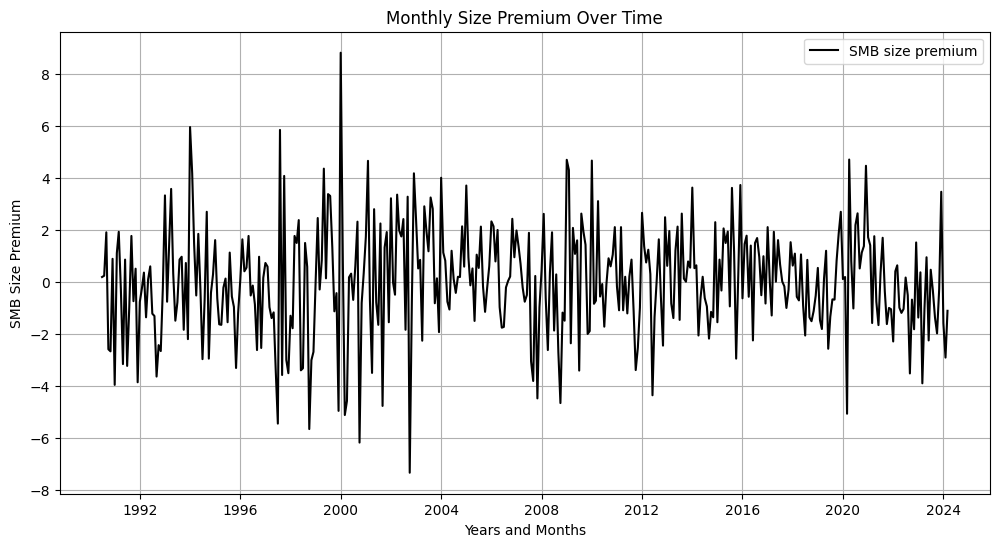

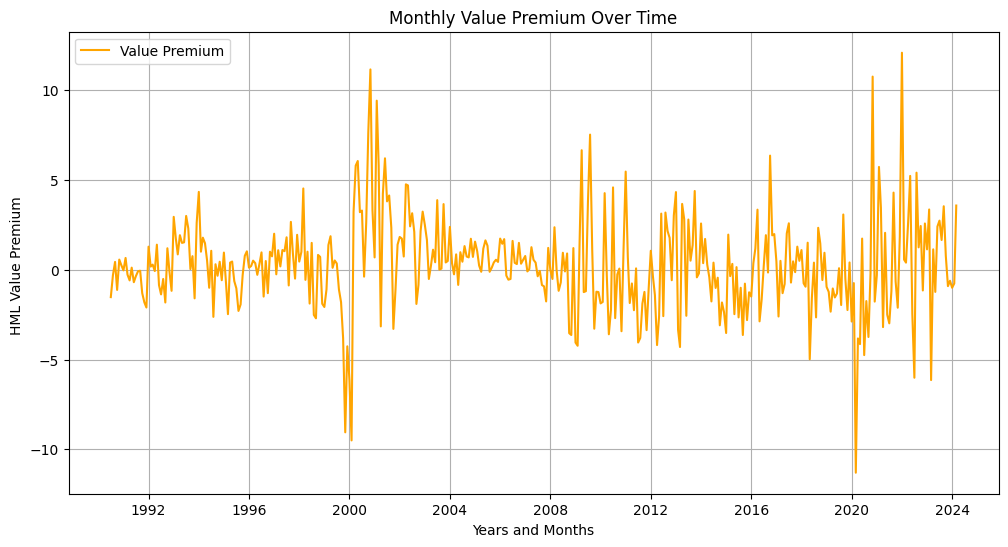

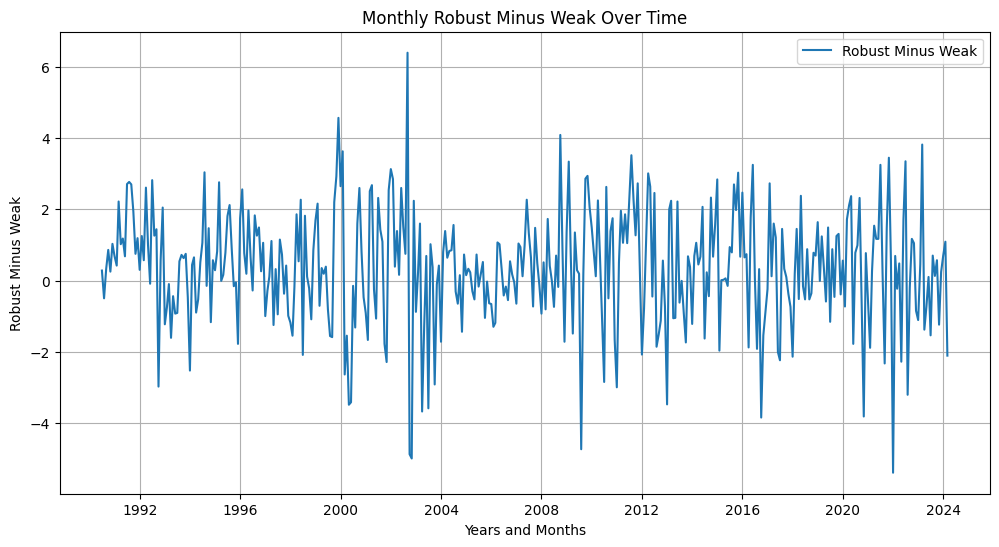

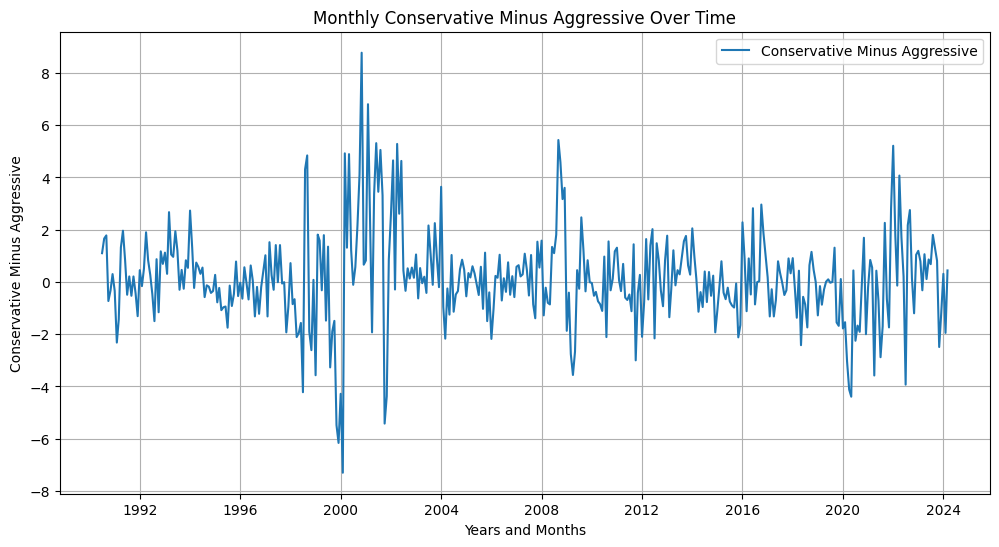

In [686]:
# converting 'Years and Months' and 'Years' to datetime format
df_months['Years and Months'] = pd.to_datetime(df_months['Years and Months'], format='%Y%m', errors='coerce')

print(df_months.dtypes)

# Plotting the time series to understand data to determine M window

# 'Mkt-RF' for df_months_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['Mkt-RF'], label='Market Risk Premium')
plt.title('Monthly Market Risk Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('Market Risk Premium')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Market Risk Premium Over Time.png')
plt.show()

# 'SMB' for df_months_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['SMB'], label='SMB size premium',color='black')
plt.title('Monthly Size Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('SMB Size Premium')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Size Premium Over Time.png')
plt.show()


# for df_months_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['HML'], label='Value Premium',color='orange')
plt.title('Monthly Value Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('HML Value Premium ')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Value Premium Over Time.png')
plt.show()

# 'RMW' for df_months_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['RMW'], label='Robust Minus Weak')
plt.title('Monthly Robust Minus Weak Over Time')
plt.xlabel('Years and Months')
plt.ylabel('Robust Minus Weak')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Robust Minus Weak Over Time.png')
plt.show()

# 'CMA' for df_months_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['CMA'], label='Conservative Minus Aggressive')
plt.title('Monthly Conservative Minus Aggressive Over Time')
plt.xlabel('Years and Months')
plt.ylabel('Conservative Minus Aggressive')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Conservative Minus Aggressive Over Time.png')
plt.show()

## General covariance matrix check

In [687]:
# Calculate covariance matrix for the entire dataset
covariance_matrix_months = df_months.cov()

# Display the covariance matrix
print("Covariance Matrix for the Entire Dataset:")
print(covariance_matrix_months)

# Calculate covariance matrix for the last 12 months in the dataset
covariance_matrix_60 = df_months.tail(60).cov()
print("Covariance Matrix for the Last 60 Months:")
print(covariance_matrix_60)

# Calculate covariance matrix for the last 36 months in the dataset
covariance_matrix_120 = df_months.tail(120).cov()
print("Covariance Matrix for the Last 120 Months:")
print(covariance_matrix_120)

# Calculate covariance matrix for the last 6 months in the dataset    
covariance_matrix_240 = df_months.tail(240).cov()
print("Covariance Matrix for the Last 240 Months:")
print(covariance_matrix_240)

Covariance Matrix for the Entire Dataset:
                  Years and Months        Mkt-RF           SMB           HML  \
Years and Months      9.476420e+34  2.328611e+16  2.030402e+16 -5.002466e+16   
Mkt-RF                2.328611e+16  2.494896e+01 -9.764299e-01  2.255056e+00   
SMB                   2.030402e+16 -9.764299e-01  4.401208e+00 -1.648155e-02   
HML                  -5.002466e+16  2.255056e+00 -1.648155e-02  6.874673e+00   
RMW                  -2.870950e+16 -1.974312e+00 -1.703810e-02 -2.543920e+00   
CMA                  -3.768906e+16 -2.577464e+00 -1.413930e-01  2.828221e+00   
RF                   -3.431079e+16 -2.765554e-02 -6.030807e-02  3.325025e-02   

                           RMW           CMA            RF  
Years and Months -2.870950e+16 -3.768906e+16 -3.431079e+16  
Mkt-RF           -1.974312e+00 -2.577464e+00 -2.765554e-02  
SMB              -1.703810e-02 -1.413930e-01 -6.030807e-02  
HML              -2.543920e+00  2.828221e+00  3.325025e-02  
RMW         

## General Mean check

In [688]:
# Calculate covariance matrix for the entire dataset
mean_matrix_months = df_months.mean()

# Display the covariance matrix
print("Mean Matrix for the Entire Dataset:")
print(mean_matrix_months)

# Calculate covariance matrix for the last 12 months in the dataset
mean_matrix_60 = df_months.tail(60).mean()
print("Mean Matrix for the Last 60 Months:")
print(mean_matrix_60)

# Calculate covariance matrix for the last 36 months in the dataset
mean_matrix_120 = df_months.tail(120).mean()
print("Mean Matrix for the Last 120 Months:")
print(mean_matrix_120)

# Calculate covariance matrix for the last 6 months in the dataset    
mean_matrix_240 = df_months.tail(240).mean()
print("Mean Matrix for the Last 240 Months:")
print(mean_matrix_240)

Mean Matrix for the Entire Dataset:
Years and Months    2007-05-02 04:01:46.666666752
Mkt-RF                                   0.498543
SMB                                      0.017136
HML                                      0.278667
RMW                                      0.357852
CMA                                      0.125556
RF                                       0.209259
dtype: object
Mean Matrix for the Last 60 Months:
Years and Months    2021-09-15 14:00:00
Mkt-RF                         0.644333
SMB                           -0.152167
HML                            0.160167
RMW                              0.1935
CMA                           -0.167833
RF                             0.159167
dtype: object
Mean Matrix for the Last 120 Months:
Years and Months    2019-03-17 11:24:00
Mkt-RF                          0.40575
SMB                             -0.0275
HML                              -0.094
RMW                               0.288
CMA                             -

In [689]:
# Convert the 'Years and Months' column to datetime format with explicit format specification
df_months['Years and Months'] = pd.to_datetime(df_months['Years and Months'], format='%Y%m', errors='coerce')

# Set the 'Years and Months' column as the index of the DataFrame
df_months.set_index('Years and Months', inplace=True)


# Question2 Estimation Windows 

In [690]:
# Define window sizes
window_sizes = [60, 120, 240] 

## Question 3 mean and covariance matrices

Q3 Part 1 - At every possible time t, use the data of the previous M periods to estimate the mean and covariance matrix of returns using the unbiase sample estimator for the mean and covariance matrix.

Using Rolling Means and Rolling_covariances

In [695]:
M1_window_size = window_sizes[0]  # This gets 60 from the list [60, 120, 240]

# Retrieve the rolling means and covariances for M1 and saving in csv format(60 months)
M1_rolling_means = results[M1_window_size]['rolling_means']
M1_rolling_covariances = results[M1_window_size]['rolling_covariances']

# Print the results for M1
print(f"Rolling Means for Window Size {M1_window_size} Months:")
print(M1_rolling_means.head())
print("\nRolling Covariances for Window Size {M1_window_size} Months:")
print(M1_rolling_covariances.head())

#saving the results in csv
M1_rolling_means.to_csv('60_rolling_means.csv')
M1_rolling_covariances.to_csv('60_rolling_covariances.csv')

Rolling Means for Window Size 60 Months:
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
1995-06-01        0.218833 -0.234167  0.205333  0.579833  0.266333  0.369000
1995-07-01        0.211000 -0.263167  0.213500  0.605333  0.218833  0.365167
1995-08-01        0.324833 -0.248333  0.180333  0.649000  0.188833  0.362000
1995-09-01        0.567500 -0.289500  0.140833  0.658333  0.143833  0.359167
1995-10-01        0.448167 -0.262333  0.154667  0.641333  0.148333  0.355667

Rolling Covariances for Window Size {M1_window_size} Months:
                            Mkt-RF       SMB       HML       RMW       CMA  \
Years and Months                                                             
1995-06-01       Mkt-RF  18.663617 -1.699127  0.925145  0.749140 -0.496133   
                 SMB     -1.699127  4.092025  1.085621 -0.817138  0.578374   
                 HML      0.925145  1.085621  

In [696]:
# Access the results for the second window size, which is 120 months
M2_window_size = window_sizes[1]  # This gets 120 from the list [60, 120, 240]

# Retrieve the rolling means and covariances for M2 and saving in csv (120 months)
M2_rolling_means = results[M2_window_size]['rolling_means']
M2_rolling_covariances = results[M2_window_size]['rolling_covariances']

# Print the results for M2
print(f"Rolling Means for Window Size {M2_window_size} Months:")
print(M2_rolling_means.head())
print("\nRolling Covariances for Window Size {M2_window_size} Months:")
print(M2_rolling_covariances.head())

#saving the results in csv
M2_rolling_means.to_csv('120_rolling_means.csv')
M2_rolling_covariances.to_csv('120_rolling_covariances.csv')

Rolling Means for Window Size 120 Months:
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
2000-06-01        0.612667 -0.302667  0.047167  0.468917 -0.091083  0.392417
2000-07-01        0.562333 -0.310000  0.087333  0.465333 -0.101167  0.390750
2000-08-01        0.639917 -0.306833  0.086667  0.458500 -0.110250  0.389417
2000-09-01        0.699917 -0.303417  0.105000  0.469083 -0.107083  0.388667
2000-10-01        0.623667 -0.333333  0.177917  0.483583 -0.066750  0.387667

Rolling Covariances for Window Size {M2_window_size} Months:
                            Mkt-RF       SMB       HML       RMW       CMA  \
Years and Months                                                             
2000-06-01       Mkt-RF  16.245704 -3.381837  0.731468  0.349451 -2.261729   
                 SMB     -3.381837  5.842663 -0.446972  0.016687  0.339273   
                 HML      0.731468 -0.446972 

In [697]:
# Access the results for the third window size, which is 240 months
M3_window_size = window_sizes[2]  # This gets 240 from the list [60, 120, 240]

# Retrieve the rolling means and covariances for M3 (240 months)
M3_rolling_means = results[M3_window_size]['rolling_means']
M3_rolling_covariances = results[M3_window_size]['rolling_covariances']

# Print the results for M3
print(f"Rolling Means for Window Size {M3_window_size} Months:")
print(M3_rolling_means.head())
print("\nRolling Covariances for Window Size {M3_window_size} Months:")
print(M3_rolling_covariances.head())

#saving the data in csv
M3_rolling_means.to_csv('240_rolling_means.csv')
M3_rolling_covariances.to_csv('240_rolling_covariances.csv')

Rolling Means for Window Size 240 Months:
                    Mkt-RF           SMB       HML       RMW       CMA  \
Years and Months                                                         
2010-06-01        0.372625  9.291667e-03  0.509458  0.389583  0.255667   
2010-07-01        0.403542  1.333333e-03  0.534917  0.376542  0.255125   
2010-08-01        0.431125 -5.551115e-18  0.524958  0.389583  0.239417   
2010-09-01        0.530083 -4.166667e-03  0.522042  0.386125  0.238458   
2010-10-01        0.523958  9.125000e-03  0.527000  0.388333  0.240167   

                        RF  
Years and Months            
2010-06-01        0.298583  
2010-07-01        0.295792  
2010-08-01        0.293083  
2010-09-01        0.290625  
2010-10-01        0.287833  

Rolling Covariances for Window Size {M3_window_size} Months:
                            Mkt-RF       SMB       HML       RMW       CMA  \
Years and Months                                                             
2010-06-01       M

# Target Expected Return
Using CAPM method to determine the returns

In [698]:
# Calculate the means of the last period for Mkt-RF and RF
mean_mkt_rf = df_months['Mkt-RF'].mean()
mean_rf = df_months['RF'].mean()

# On researching the market is more volatile than the assets the beta for the investment is 0.6
beta_a = 0.6  # Example beta value, replace with actual beta

# Calculate the expected return using the formula
expected_return = mean_rf + beta_a * (mean_mkt_rf) 
print(f"Mean Market Risk Premium - Mean Risk Free Rate : {mean_mkt_rf}")
print(f"Mean Risk-Free Rate (RF): {mean_rf}")
print(f"Expected Return: {expected_return}")


Mean Market Risk Premium - Mean Risk Free Rate : 0.4985432098765432
Mean Risk-Free Rate (RF): 0.20925925925925926
Expected Return: 0.5083851851851852


In [699]:
# Calculate historical mean returns for each factor
historical_mean_returns = df_months.mean() 

# Calculate the historical mean return of the portfolio
# Assuming equal weight for each factor
num_factors = len(historical_mean_returns) - 1  # Exclude RF
equal_weights = np.array([1. / num_factors] * num_factors)
historical_portfolio_mean_return = np.dot(equal_weights, historical_mean_returns[:-1])  # Exclude RF

print(f"Historical Mean Returns:\n{historical_mean_returns}")
print(f"\nHistorical Portfolio Mean Return: {historical_portfolio_mean_return}")


Historical Mean Returns:
Mkt-RF    0.498543
SMB       0.017136
HML       0.278667
RMW       0.357852
CMA       0.125556
RF        0.209259
dtype: float64

Historical Portfolio Mean Return: 0.2555506172839507


Average of CAPM and historical means

In [700]:
expected_return_final = (historical_portfolio_mean_return + expected_return ) / 2
expected_return_final = expected_return_final.round(4)
print(f'Final expected returns: {expected_return_final}')


Final expected returns: 0.382


## Question 3 - Mean variance portfolio
Solving the optimisation problem to determine the optimal portfolio at time t and then Computing
the return obtained by this portfolio in the investment period from t to t+1.

In [701]:
def portfolio_optimization(mean_returns, cov_matrix, target_return):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    
    def portfolio_variance(weights, mean_returns, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(portfolio_variance,
                      num_assets * [1. / num_assets],
                      args=args,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    return result.x


target_return = 0.3819679012345679
optimization_results = {}

for M in window_sizes:
    rolling_means = results[M]['rolling_means']
    rolling_covariances = results[M]['rolling_covariances']
    
    portfolio_returns = []
    optimal_weights_all = []
    for t in range(len(rolling_means) - 1):
        mean_returns = rolling_means.iloc[t][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
        cov_matrix = rolling_covariances.loc[rolling_means.index[t]].loc[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

        # Solve the optimization problem
        optimal_weights = portfolio_optimization(mean_returns, cov_matrix, target_return)
        optimal_weights_all.append(optimal_weights)
        
        # Compute the return obtained by this portfolio in the investment period from t to t+1
        next_period_return = np.dot(optimal_weights, df_months.iloc[t + M][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].values)
        portfolio_returns.append(next_period_return)
    
    # Compute the portfolio's expected return and variance for the last period
    expected_return = np.dot(optimal_weights, mean_returns)
    portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))
    
    optimization_results[M] = {
        'optimal_weights': optimal_weights,
        'expected_return': expected_return,
        'portfolio_variance': portfolio_variance,
        'portfolio_std_dev': np.sqrt(portfolio_variance),
        'portfolio_returns': portfolio_returns
    }

    # Print the detailed results for each window size
    print(f"Optimal Weights for Window Size {M} Months:")
    for asset, weight in zip(mean_returns.index, optimal_weights):
        print(f"{asset}: {weight:.4f}")

    print(f"\nTarget Expected Return: {target_return:.4f}")
    print(f"Expected Return of Optimized Portfolio: {expected_return:}")
    print(f"Variance of Optimized Portfolio: {portfolio_variance:.4f}")
    print(f"Standard Deviation of Optimized Portfolio: {np.sqrt(portfolio_variance):.4f}")
    print(f"Portfolio Returns: {portfolio_returns[:5]}") 
    print("\n" + "-"*50 + "\n")


Optimal Weights for Window Size 60 Months:
Mkt-RF: 0.3786
SMB: 0.0000
HML: 0.0000
RMW: 0.6214
CMA: 0.0000

Target Expected Return: 0.3820
Expected Return of Optimized Portfolio: 0.3819679005442957
Variance of Optimized Portfolio: 5.9966
Standard Deviation of Optimized Portfolio: 2.4488
Portfolio Returns: [0.11516119705391747, 0.1934696263944934, -0.4209480614726232, -0.2675902142151783, 0.30095775236131306]

--------------------------------------------------

Optimal Weights for Window Size 120 Months:
Mkt-RF: 1.0000
SMB: 0.0000
HML: 0.0000
RMW: 0.0000
CMA: 0.0000

Target Expected Return: 0.3820
Expected Return of Optimized Portfolio: 0.37408333333328675
Variance of Optimized Portfolio: 22.6235
Standard Deviation of Optimized Portfolio: 4.7564
Portfolio Returns: [0.5439977569131346, -1.1132041545595963, 1.3396638582193794, 3.655003916930271, 3.6296930944609347]

--------------------------------------------------

Optimal Weights for Window Size 240 Months:
Mkt-RF: 0.2173
SMB: 0.0000
HM

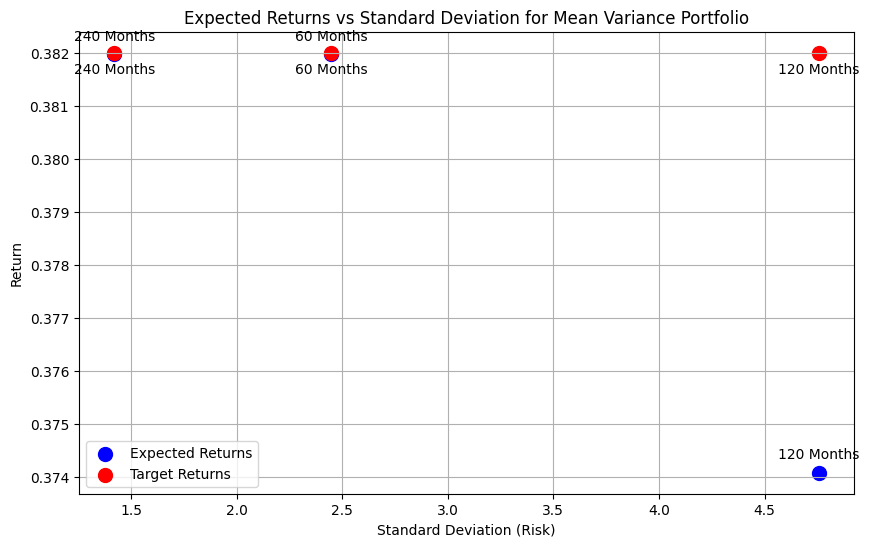

In [702]:
import matplotlib.pyplot as plt

# Data for each window size
window_sizes = [60, 120, 240]
expected_returns = [0.3819679005442957, 0.37408333333328675, 0.3819679012073063]
std_deviations = [2.4488, 4.7564, 1.4202]
target_returns = [0.3820, 0.3820, 0.3820]  # Assuming the same target return for each window size

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(std_deviations, expected_returns, color='blue', s=100, label='Expected Returns')
plt.scatter(std_deviations, target_returns, color='red', s=100, label='Target Returns')

# Annotate each point
for i, window in enumerate(window_sizes):
    plt.annotate(f'{window} Months', (std_deviations[i], expected_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{window} Months', (std_deviations[i], target_returns[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Expected Returns vs Standard Deviation for Mean Variance Portfolio')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

## Question 4 - Minimum Variance Portfolio

Use Rolling estimates as inputs for a single-period minimum-variance portfolio optimization problem, i.e. a mean-variance problem without constraint for the mean and Computing the return obtained by this portfolio in the investment period from t to t+1.


In [703]:
def minimum_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    args = (cov_matrix,)
    
    def portfolio_variance(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(portfolio_variance,
                      num_assets * [1. / num_assets],
                      args=args,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    return result.x

optimization_results = {}

for M in window_sizes:
    rolling_means = results[M]['rolling_means']
    rolling_covariances = results[M]['rolling_covariances']
    
    portfolio_returns = []
    optimal_weights_all = []
    for t in range(len(rolling_means) - 1):
        mean_returns_window = rolling_means.iloc[t][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
        cov_matrix_window = rolling_covariances.loc[rolling_means.index[t]].loc[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

        # Solve the optimization problem
        optimal_weights_window = minimum_variance_portfolio(cov_matrix_window)
        optimal_weights_all.append(optimal_weights_window)
        
        # Compute the return obtained by this portfolio in the investment period from t to t+1
        next_period_return = np.dot(optimal_weights_window, df_months.iloc[t + M][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].values)
        portfolio_returns.append(next_period_return)
    
    # Compute the portfolio's expected return and variance for the last period
    expected_return_window = np.dot(optimal_weights_window, mean_returns_window)
    portfolio_variance_window = np.dot(optimal_weights_window.T, np.dot(cov_matrix_window, optimal_weights_window))
    
    optimization_results[M] = {
        'optimal_weights': optimal_weights_window,
        'expected_return': expected_return_window,
        'portfolio_variance': portfolio_variance_window,
        'portfolio_std_dev': np.sqrt(portfolio_variance_window),
        'portfolio_returns': portfolio_returns
    }

    # Print the detailed results for each window size
    print(f"Optimal Weights for Window Size {M} Months:")
    for asset, weight in zip(mean_returns_window.index, optimal_weights_window):
        print(f"{asset}: {weight:.4f}")

    print(f"Expected Return of Optimized Portfolio: {expected_return_window:.4f}")
    print(f"Variance of Optimized Portfolio: {portfolio_variance_window:.4f}")
    print(f"Standard Deviation of Optimized Portfolio: {np.sqrt(portfolio_variance_window):.4f}")
    print(f"Portfolio Returns: {portfolio_returns[:5]}")  # Print first 5 portfolio returns for brevity
    print("\n" + "-"*50 + "\n")


Optimal Weights for Window Size 60 Months:
Mkt-RF: 0.0076
SMB: 0.2042
HML: 0.0394
RMW: 0.4171
CMA: 0.3317
Expected Return of Optimized Portfolio: 0.0146
Variance of Optimized Portfolio: 0.3041
Standard Deviation of Optimized Portfolio: 0.5514
Portfolio Returns: [0.07082996262993377, 0.19861347193821968, -0.41875818211948107, -0.2849634801617105, 0.23136049798905955]

--------------------------------------------------

Optimal Weights for Window Size 120 Months:
Mkt-RF: 0.0225
SMB: 0.1952
HML: 0.0624
RMW: 0.3896
CMA: 0.3303
Expected Return of Optimized Portfolio: 0.0644
Variance of Optimized Portfolio: 0.2622
Standard Deviation of Optimized Portfolio: 0.5121
Portfolio Returns: [0.6729247219894053, -0.6862641665642788, 1.7276838707094888, 2.8405920640791344, 3.4477176671783356]

--------------------------------------------------

Optimal Weights for Window Size 240 Months:
Mkt-RF: 0.0289
SMB: 0.1451
HML: 0.1520
RMW: 0.4412
CMA: 0.2328
Expected Return of Optimized Portfolio: 0.1745
Varian

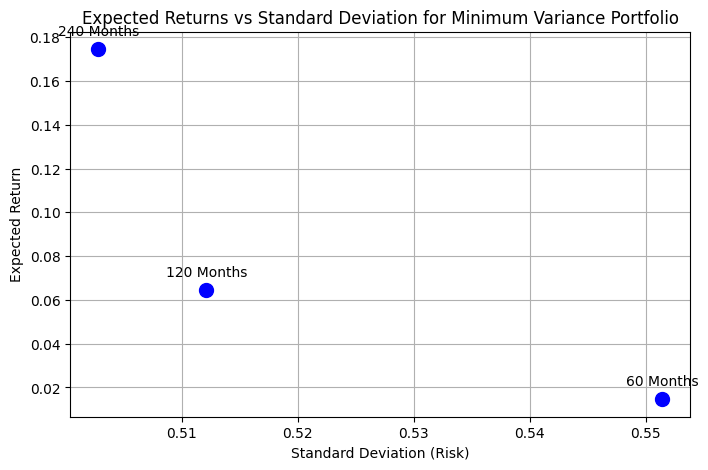

In [704]:
# Data for each window size with optimal weights
window_sizes = [60, 120, 240]
expected_returns = [0.0146, 0.0644, 0.1745]
std_deviations = [0.5514, 0.5121, 0.5028]

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(std_deviations, expected_returns, color='blue', s=100)

# Annotate each point
for i, window in enumerate(window_sizes):
    plt.annotate(f'{window} Months', (std_deviations[i], expected_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Expected Returns vs Standard Deviation for Minimum Variance Portfolio')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

## QUESTION 5 - Naive Model
computing the return obtained by the portfolio with weight 1/N for each of N available assets in the investment period from t to t+1.

In [705]:
# Define assets
assets = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

# Calculate overall mean and covariance
mean_returns = df_months.mean()
cov_matrix = df_months.cov()

# Calculate naive portfolio
def naive_portfolio(mean_returns, cov_matrix, assets):
    num_assets = len(assets)
    equal_weights = np.array([1. / num_assets] * num_assets)

    expected_return = np.dot(equal_weights, mean_returns)
    portfolio_variance = np.dot(equal_weights.T, np.dot(cov_matrix, equal_weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)

    return equal_weights, expected_return, portfolio_variance, portfolio_std_dev

# Calculate naive portfolio results
naive_equal_weights, naive_expected_return, naive_portfolio_variance, naive_portfolio_std_dev = naive_portfolio(
    mean_returns[assets], cov_matrix.loc[assets, assets], assets
)

# Print the results
print("Equal Weights Portfolio:")
for asset, weight in zip(assets, naive_equal_weights):
    print(f"{asset}: {weight:.4f}")

print(f"\nExpected Return of Equal Weighted Portfolio: {naive_expected_return:.4f}")
print(f"Variance of Equal Weighted Portfolio: {naive_portfolio_variance:.4f}")
print(f"Standard Deviation of Equal Weighted Portfolio: {naive_portfolio_std_dev:.4f}")

# Calculate the return obtained by this portfolio in the investment period from t to t+1
portfolio_returns_equal_weighted = []
for t in range(len(df_months) - 1):
    next_period_return = np.dot(naive_equal_weights, df_months.iloc[t + 1][assets].values)
    portfolio_returns_equal_weighted.append(next_period_return)


Equal Weights Portfolio:
Mkt-RF: 0.2000
SMB: 0.2000
HML: 0.2000
RMW: 0.2000
CMA: 0.2000

Expected Return of Equal Weighted Portfolio: 0.2556
Variance of Equal Weighted Portfolio: 1.3713
Standard Deviation of Equal Weighted Portfolio: 1.1710


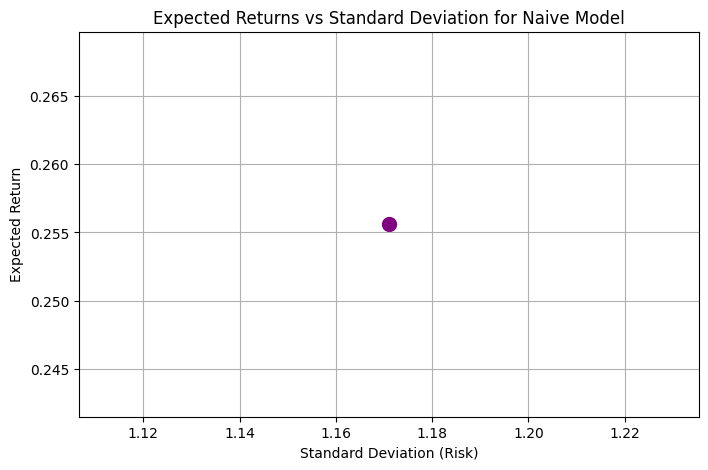

In [706]:
import matplotlib.pyplot as plt

# Data for each window size with equal weights
expected_returns = [0.2556]
std_deviations = [1.1710]

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(std_deviations, expected_returns, color='purple', s=100)

plt.title('Expected Returns vs Standard Deviation for Naive Model')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

## Question 6 mean-standard deviation diagram for all the portfolio results

In [707]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
final_results_data = {
    'Method': [
        'Mean-Variance Portfolio (60 Months)', 'Mean-Variance Portfolio (120 Months)', 'Mean-Variance Portfolio (240 Months)',
        'Minimum Variance Portfolio (60 Months)', 'Minimum Variance Portfolio (120 Months)', 'Minimum Variance Portfolio (240 Months)',
        'Equal Weights Portfolio / Naive Model'
    ],
    'Expected Return': [
        0.3819, 0.3740, 0.3819,
        0.0146, 0.0644, 0.1745,
        0.2556
    ],
    'Variance': [
        5.9966, 22.6235, 2.0169,
        0.3041, 0.2622, 0.2528,
        1.3713
    ],
    'Standard Deviation': [
        2.4488, 4.7564, 1.4202,
        0.5514, 0.5121, 0.5028,
        1.1710
    ]
}

# Create a DataFrame
final_results_df = pd.DataFrame(final_results_data)

# Save the DataFrame to a CSV file
final_results_df.to_csv('portfolio_results.csv', index=False)

# Display the DataFrame
print(final_results_df)

                                    Method  Expected Return  Variance  \
0      Mean-Variance Portfolio (60 Months)           0.3819    5.9966   
1     Mean-Variance Portfolio (120 Months)           0.3740   22.6235   
2     Mean-Variance Portfolio (240 Months)           0.3819    2.0169   
3   Minimum Variance Portfolio (60 Months)           0.0146    0.3041   
4  Minimum Variance Portfolio (120 Months)           0.0644    0.2622   
5  Minimum Variance Portfolio (240 Months)           0.1745    0.2528   
6    Equal Weights Portfolio / Naive Model           0.2556    1.3713   

   Standard Deviation  
0              2.4488  
1              4.7564  
2              1.4202  
3              0.5514  
4              0.5121  
5              0.5028  
6              1.1710  


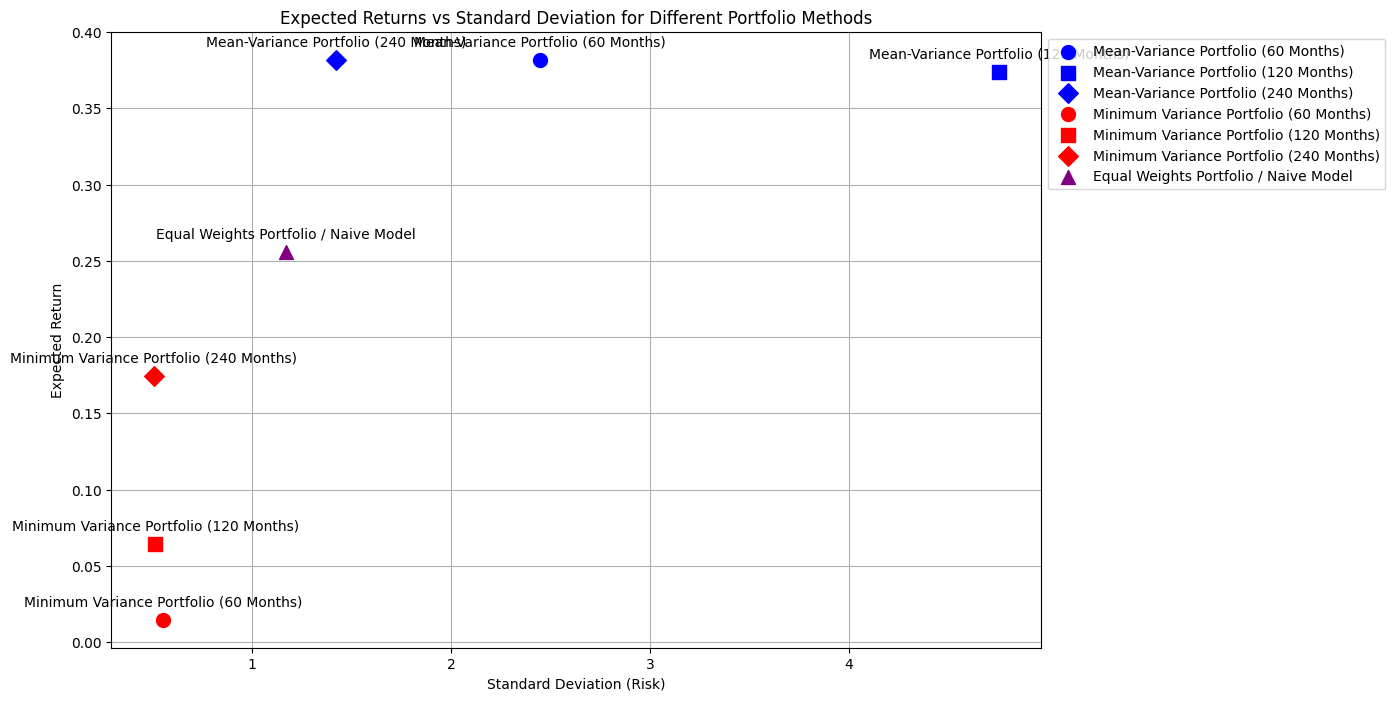

In [708]:
# Define colors and markers for each method
colors = {
    'Mean-Variance Portfolio (60 Months)': 'blue',
    'Mean-Variance Portfolio (120 Months)': 'blue',
    'Mean-Variance Portfolio (240 Months)': 'blue',
    'Minimum Variance Portfolio (60 Months)': 'red',
    'Minimum Variance Portfolio (120 Months)': 'red',
    'Minimum Variance Portfolio (240 Months)': 'red',
    'Equal Weights Portfolio / Naive Model': 'purple'
}

markers = {
    'Mean-Variance Portfolio (60 Months)': 'o',
    'Mean-Variance Portfolio (120 Months)': 's',
    'Mean-Variance Portfolio (240 Months)': 'D',
    'Minimum Variance Portfolio (60 Months)': 'o',
    'Minimum Variance Portfolio (120 Months)': 's',
    'Minimum Variance Portfolio (240 Months)': 'D',
    'Equal Weights Portfolio / Naive Model': '^'
}

# Plotting the graph between expected returns and standard deviation
plt.figure(figsize=(12, 8))

# Plot each method with its corresponding color and marker
for i, method in enumerate(final_results_df['Method']):
    plt.scatter(final_results_df['Standard Deviation'][i], final_results_df['Expected Return'][i], 
                color=colors[method], marker=markers[method], s=100, label=method)

# Annotate each point
for i, method in enumerate(final_results_df['Method']):
    plt.annotate(method, (final_results_df['Standard Deviation'][i], final_results_df['Expected Return'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Expected Returns vs Standard Deviation for Different Portfolio Methods')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()